# Surrogate Modeling using Maching Learning

James Chapman (jchapman48@gatech.edu)<br>
Ramprasad Research Group, Georgia Institute of Technology

This notebook provides scripts used to train surrogate models using one of three datasets, including random number dataset, sin finction dataset, and atoms in the periodic table dataset. The scripts provided below will train the models with three machine learning algorithms including linear regression, Gaussian Process regression (GPR), and neural network.

*NOTICE:  All information contained herein is, and remains the property of Georgia Tech Research Corporation and its sponsors, if any.  The intellectual and technical concepts contained herein are proprietary to Georgia Tech Research Corporation and its sponsors and may be covered by U.S. and Foreign Patents, patents in process, and are protected by trade secret or copyright law. Dissemination of this information or reproduction of this material is strictly forbidden unless prior written permission is obtained from Georgia Tech Research Corporation.*

In [1]:
# Some necessary modules are loaded
import numpy as np
from numpy import genfromtxt
from matplotlib import pyplot as plt 
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor

In [2]:
#file tags
random_numbers = 0
sin = 1
periodic_table = 0

In [3]:
#read a given set of data
if random_numbers:
    file = 'dataset/__SAMPLE_toy_data_X1X2X3X4.csv'
    X = genfromtxt(file, delimiter=',',skip_header=1,usecols = range(0,3))
    Y = genfromtxt(file, delimiter=',',skip_header=1,usecols = range(7,8))
elif sin:
    file = 'dataset/__SAMPLE_sin.csv'
    X = genfromtxt(file, delimiter=',',skip_header=1,usecols = range(0,1))
    Y = genfromtxt(file, delimiter=',',skip_header=1,usecols = range(1,2))
    
    X = X.reshape(-1, 1)
elif periodic_table:
    file = 'dataset/__SAMPLE_toy_data_atoms.csv'
    X = genfromtxt(file, delimiter=',',skip_header=1,usecols = range(1,13))
    Y = genfromtxt(file, delimiter=',',skip_header=1,usecols = range(13,14))

In [4]:
#set ratio of training to test ratio
test_ratio = 0.5

In [5]:
########################################################################################   
#partition training/test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_ratio)

#Linear Regression using train set
linear_model = LinearRegression().fit(X_train, Y_train)

#Gaussian Process Regression using train set
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-12, 1e2)) + WhiteKernel()
gpr_model = GaussianProcessRegressor(kernel=kernel).fit(X_train, Y_train)

#Neural Network using train set
nn_model = MLPRegressor(hidden_layer_sizes=(1000), activation='tanh', solver='lbfgs', alpha=.00001, 
                        batch_size='auto', learning_rate='adaptive', learning_rate_init=0.01, power_t=0.0005, 
                        max_iter=100, shuffle=True, random_state=False, tol=0.0001, verbose=False, warm_start=False, 
                        momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.25, 
                        beta_1=0.1, beta_2=0.999, epsilon=1e-08).fit(X_train, Y_train)

#make predictions for test set
y_lin_test= linear_model.predict(X_test)
y_lin_train= linear_model.predict(X_train)
y_gpr_test,gpr_unc_test = gpr_model.predict(X_test,return_std=True)
y_gpr_train,gpr_unc_train = gpr_model.predict(X_train,return_std=True)
y_nn_test = nn_model.predict(X_test)
y_nn_train = nn_model.predict(X_train)

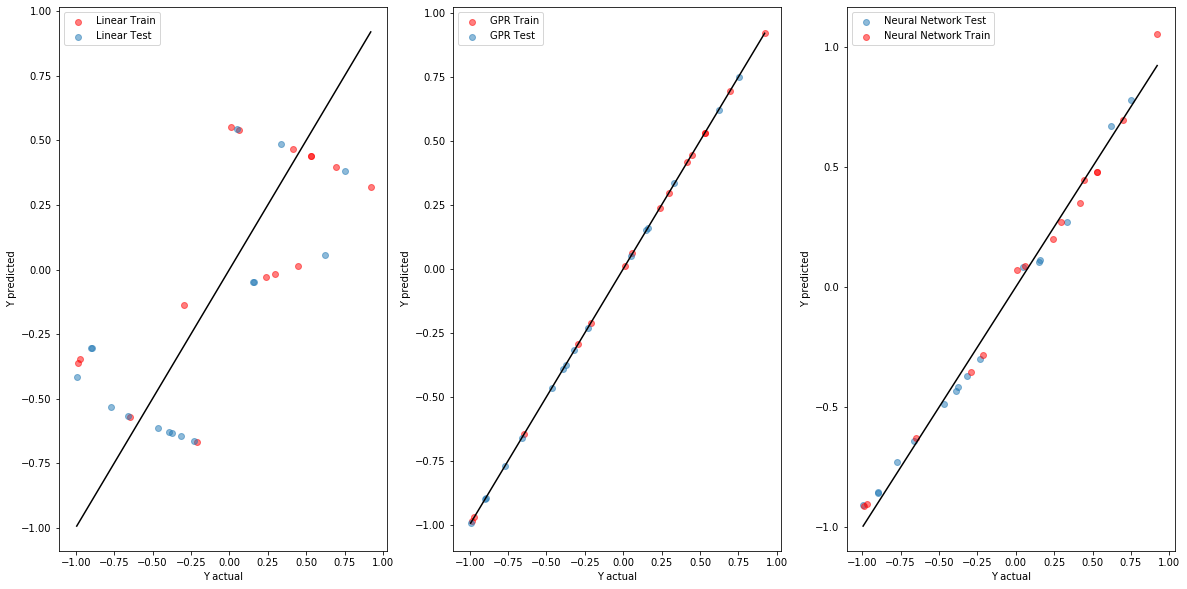

In [6]:
########################################################################################
#Plot the model predictions

#default for parity
x = np.linspace(min(Y),max(Y),len(Y))

#setup jupyter inline parameters
plt.rcParams['figure.figsize'] = [20,10]

#initialize plot objects
fig, ax = plt.subplots(1,3)

#set marker transparency
test_alpha = test_ratio
train_alpha = 1 - test_alpha

#Linear model
ax[0].scatter(Y_train,y_lin_train,color='r',label='Linear Train',alpha=train_alpha)
ax[0].scatter(Y_test,y_lin_test,label='Linear Test',alpha=test_alpha)
ax[0].plot(x,x,'k')
ax[0].set_xlabel('Y actual')
ax[0].set_ylabel('Y predicted')
ax[0].legend(loc='upper left')

#Gaussian Process model
ax[1].scatter(Y_train,y_gpr_train,color='r',alpha=train_alpha,label='GPR Train')
ax[1].scatter(Y_test,y_gpr_test,alpha=test_alpha,label='GPR Test')
ax[1].plot(x,x,'k')
ax[1].set_xlabel('Y actual')
ax[1].set_ylabel('Y predicted')
ax[1].legend(loc='upper left')

#Neural Network model
ax[2].scatter(Y_test,y_nn_test,label='Neural Network Test',alpha=test_alpha)
ax[2].scatter(Y_train,y_nn_train,color='r',alpha=train_alpha,label='Neural Network Train')
ax[2].plot(x,x,'k')
ax[2].set_xlabel('Y actual')
ax[2].set_ylabel('Y predicted')
ax[2].legend(loc='upper left')

#show the plot
plt.show()